In [1]:
%pylab inline
import json
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


# Runtime analysis

In [62]:
runtimes = []
for n in range(10,220,10) + [1000]:
    result = json.load(open('exp01-'+str(n)+'.json', 'r'))
    runtimes.append(result['runtimeInMilliseconds'])
runtimes = array(runtimes)

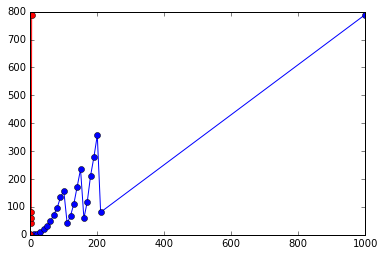

In [70]:
first = [0,10,15,20,21]
plot(range(10,220,10) + [1000], runtimes/1000, 'o-')
plot(runtimes[first]/1000, 'ro-')

# Convergence

In [7]:
result = json.load(open('exp01-5000.json', 'r'))
result['compLangs'] = map(lambda x: " ".join(x), result['compLangs'])

In [8]:
def groupedCounts(data, groups):
    all_counts = Counter(data)
    counts = map(lambda x: all_counts[x], groups)
    counts.append(len(data) - sum(counts))
    return array(counts)

In [9]:
data = [s for r in result['value'] for s in r][:100]

relFreqs = []
for N in range(1,len(data)):
    counts = groupedCounts(data[:N], result['compLangs'])
    relFreqs.append(counts / (sum(counts) + 0.0))


# Convergence: eigenvalues

In [114]:
def get2ndEigenValue(fn):
    result = json.load(open(fn, 'r'))
    data = [s for r in result['value'] for s in r]
    id2lang = dict(enumerate(unique(data)))
    lang2id = dict([(v, k) for k,v in id2lang.items()])
    lang2id
    transitionCounts = zeros((len(id2lang), len(id2lang)))
    for h1, h2 in zip(data[:-1], data[1:]):
        transitionCounts[lang2id[h1], lang2id[h2]] += 1

    T = np.array(transitionCounts+0.0)
    T = T / T.sum(axis=1)[:, np.newaxis]

    # Second eigenvalue
    lambs = np.linalg.eig(T)[0]
    return sorted(lambs)[-2]

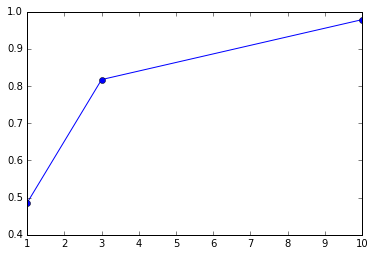

In [115]:
# b = 1, alpha = 0.5, eps = 0.05
b1 = get2ndEigenValue('exp01-5000.json')

# b = 3, alpha = 0.5, eps = 0.05
b3 = get2ndEigenValue('exp02-5000.json')

# b = 10, alpha = 0.5, eps = 0.05
b10 = get2ndEigenValue('exp03-5000.json')

plot([1,3,10], [b1,b3,b10],'o-')

(0.54944554241064847+0j)

In [103]:
# b = 10
get2ndEigenValue('exp03-5000.json')

(0.97830462595381396+0j)

In [93]:
result = json.load(open('exp03-5000.json', 'r'))
data = [s for r in result['value'] for s in r]
id2lang = dict(enumerate(unique(data)))
lang2id = dict([(v, k) for k,v in id2lang.items()])
lang2id
transitionCounts = zeros((len(id2lang), len(id2lang)))
for h1, h2 in zip(data[:-1], data[1:]):
    transitionCounts[lang2id[h1], lang2id[h2]] += 1

T = np.array(transitionCounts+0.0)
T = T / T.sum(axis=1)[:, np.newaxis]

# Second eigenvalue
lambs =np.linalg.eig(T)[0]

In [96]:
sorted(lambs)[::-1]

[(1.0000000000000078+0j),
 (0.97830462595381396+0j),
 (0.97272314603275656+0j),
 (0.96719524957433567+0j),
 (0.92303389651067358+0j),
 (0.83276298089407186+0j),
 (0.82769248054627709+0j),
 (0.82189983776027153+0.012305445715774905j),
 (0.82189983776027153-0.012305445715774905j),
 (0.81514801125164693+0j),
 (0.79291486074504158+0j),
 (0.78189407870071537+0.024166479030274697j),
 (0.78189407870071537-0.024166479030274697j),
 (0.7795041121305808+0.062581063466035272j),
 (0.7795041121305808-0.062581063466035272j),
 (0.76844216094242501+0.03441733266594553j),
 (0.76844216094242501-0.03441733266594553j),
 (0.75973389938710922+0.0071738530337828134j),
 (0.75973389938710922-0.0071738530337828134j),
 (0.74624602090571102+0.073543881839092565j),
 (0.74624602090571102-0.073543881839092565j),
 (0.72717028831293129+0.056696229781999889j),
 (0.72717028831293129-0.056696229781999889j),
 (0.72577296847125206+0.029058281469685115j),
 (0.72577296847125206-0.029058281469685115j),
 (0.70721690173573915+0.

In [83]:
sorted(map(abs, lambs))[::-1][1]

0.48619370841507986

In [88]:
lambs

array([  1.00000000e+00+0.j        ,   4.86193708e-01+0.j        ,
         4.50324331e-01+0.j        ,   3.40291344e-01+0.j        ,
         2.52408947e-01+0.06472434j,   2.52408947e-01-0.06472434j,
         2.35719745e-01+0.09904922j,   2.35719745e-01-0.09904922j,
         2.52060150e-01+0.00581112j,   2.52060150e-01-0.00581112j,
         1.90983209e-01+0.13533944j,   1.90983209e-01-0.13533944j,
         1.65949022e-01+0.15107871j,   1.65949022e-01-0.15107871j,
        -8.57089321e-02+0.21893765j,  -8.57089321e-02-0.21893765j,
         1.64847525e-02+0.23289004j,   1.64847525e-02-0.23289004j,
         7.40254959e-02+0.2168588j ,   7.40254959e-02-0.2168588j ,
         9.64866366e-04+0.23086414j,   9.64866366e-04-0.23086414j,
        -1.28859129e-01+0.18711997j,  -1.28859129e-01-0.18711997j,
        -2.08025290e-01+0.09641766j,  -2.08025290e-01-0.09641766j,
        -2.16685115e-01+0.07317515j,  -2.16685115e-01-0.07317515j,
        -5.46090402e-02+0.22035749j,  -5.46090402e-02-0.220357

In [63]:
np.linalg.eig([[0,-1],[1,0]])

(array([ 0.+1.j,  0.-1.j]),
 array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
        [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]]))